#Beedupalli PavanSaiRoyal     
<h1 style="font-size:20px">12103366</h1>
<h1 style="font-size:15px">RK21UNA06</h1>

# VED PRAKASH CHOUBEY

<h1 style="font-size:30px">Patient Treatment Classification</h1>

# 1. Context
In hospitals, medical treatments and surgeries can be categorized into inpatient and outpatient procedures.<br> For patients, it is important to understand the difference between these two types of care, because they impact the length of a patient’s stay in a medical facility and the cost of a procedure.

<b>Inpatient Care (Incare Patient) and Outpatient Care (Outcare Patient)</b>

The difference between an inpatient and outpatient care is how long a patient must remain in the facility where they have the procedure done.

Inpatient care requires overnight hospitalization. Patients must stay at the medical facility where their procedure was done (which is usually a hospital) for at least one night. During this time, they remain under the supervision of a nurse or doctor.

Patients receiving outpatient care do not need to spend a night in a hospital. They are free to leave the hospital once the procedure is over. In some exceptional cases, they need to wait while anesthesia wears off or to make sure there are not any complications. As long as there are not any serious complications, patients do not have to spend the night being supervised.<br>
<i>[source of information: pbmhealth]

## Problem Statement
In today’s world of automation, the skills and knowledge of a person could be utilized at the best places possible by automating tasks wherever possible. As a part of the hospital automation system, one can build a system that would predict and estimate whether the patient should be categorized as an incare patient or an outcare patient with the help of several data points about the patients, their conditions and lab tests.

# 2. About Data
The dataset contains Electronic Health Record predictions collected from a private Hospital in Indonesia. It contains the patient's laboratory test results used to determine the next patient's treatment whether <b>in care</b> or <b>out care.</b>

### Attribute information
- HAEMATOCRIT : Patient laboratory test result of haematocrit

- HAEMOGLOBINS : Patient laboratory test result of haemoglobins

- ERYTHROCYTE : Patient laboratory test result of erythrocyte

- LEUCOCYTE : Patient laboratory test result of leucocyte

- THROMBOCYTE : Patient laboratory test result of thrombocyte

- MCH : Patient laboratory test result of MCH

- MCHC : Patient laboratory test result of MCHC

- MCV : Patient laboratory test result of MCV

- AGE : Patient age

- SEX : Patient gender

- SOURCE : Target ( Binary :in/out )

#### Acknowledgements
This dataset was originally downloaded from Mendeley Data.
Sadikin, Mujiono (2020), “EHR Dataset for Patient Treatment Classification”, Mendeley Data, V1, doi: 10.17632/7kv3rctx7m.1<br>


# 3. Objective:
- Build a machine learning model to predict if the patient should be classified as <b>in care</b> or <b>out care</b> based on the patient's laboratory test result.


## Machine Learning Solution
- It is a Supervised Machine Learning Problem
- Binary Classification task (0 or 1)
- Performance metrics
    - Precision
    - Recall
    - Accuracy

# 4. Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

import pickle

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-whitegrid')

# 5. Load and split data

In [2]:
# Load dataset into the memory

data = pd.read_csv('patientdata.csv')
data.head(3)

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE,SEX,SOURCE
0,35.1,11.8,4.65,6.3,310,25.4,33.6,75.5,1,F,out
1,43.5,14.8,5.39,12.7,334,27.5,34.0,80.7,1,F,out
2,33.5,11.3,4.74,13.2,305,23.8,33.7,70.7,1,F,out


Let's divide the data into train and test sets.<br>
Train : 80% of data<br>
Test : 20% of data

In [16]:
# Label encoding
# (1=in care patient), (0=out care patient)
data['SOURCE'] = data.SOURCE.replace({"in":1, 'out':0})


# get all the features
features = [feat for feat in data.columns if feat !='SOURCE']

X = data[features] # feature set
y = data['SOURCE'] # target

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# train and test datasets dimensions
X_train.shape, X_test.shape

((3529, 10), (883, 10))

# 6. Exploratory data analysis

### Dataset Overview

In [17]:
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

num_features = [feat for feat in features if data[feat].dtype != object]
cat_features = [feat for feat in features if data[feat].dtype == object]

print(f"Total number of features : {len(features)}")
print(f"Number of numerical features : {len(num_features)}")
print(f"Number of categorical features : {len(cat_features)}\n")

The dataset contains 4412 rows and 11 columns
Total number of features : 10
Number of numerical features : 9
Number of categorical features : 1



### Missing values

In [18]:
# Show the percentage of missing values in each feature

data.isna().mean().to_frame(name='Missing %')

,Missing %
HAEMATOCRIT,0.0
HAEMOGLOBINS,0.0
ERYTHROCYTE,0.0
LEUCOCYTE,0.0
THROMBOCYTE,0.0
MCH,0.0
MCHC,0.0
MCV,0.0
AGE,0.0
SEX,0.0


Observation : Luckily, we didn't find any missing values.

### Unique values

In [19]:
# To count number unique values in each feature

data.nunique().to_frame(name='# of unique values')

,# of unique values
HAEMATOCRIT,326
HAEMOGLOBINS,128
ERYTHROCYTE,433
LEUCOCYTE,276
THROMBOCYTE,554
MCH,189
MCHC,105
MCV,406
AGE,95
SEX,2


## 6.1 Univariate analysis 
Exploring each feature individually


### 6.1.1 Target 
name : SOURCE<br>
There are two classes in the target
- 0 : Outcare patient
- 1 : Incare patient

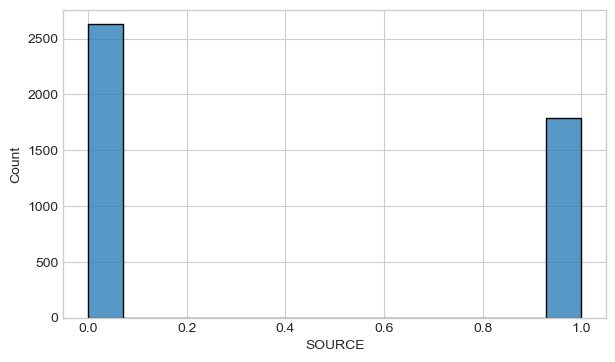

In [20]:
# Target distribution

plt.figure(figsize=(7,4))
fig = sns.histplot(x='SOURCE', data=data)

In [21]:
# Check no. of data points for each class

data.SOURCE.value_counts().to_frame(name='Count')

,Count
0,2628
1,1784


Observation : 
- data points belongs to class 0 : 1992
- data points belongs to class 1 : 1317
- Not an imbalanced dataset

### 6.1.2 Numerical features
names :
- HAEMATOCRIT
- HAEMOGLOBINS
- ERYTHROCYTE
- LEUCOCYTE
- THROMBOCYTE
- MCH
- MCHC
- MCV
- AGE

In [22]:
data[num_features].describe()

,HAEMATOCRIT,HAEMOGLOBINS,ERYTHROCYTE,LEUCOCYTE,THROMBOCYTE,MCH,MCHC,MCV,AGE
count,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000,4412.000000
mean,38.197688,12.741727,4.541260,8.718608,257.524479,28.234701,33.343042,84.612942,46.626473
std,5.974784,2.079903,0.784091,5.049041,113.972365,2.672639,1.228664,6.859101,21.731218
min,13.700000,3.800000,1.480000,1.100000,8.000000,14.900000,26.000000,54.000000,1.000000
25%,34.375000,11.400000,4.040000,5.675000,188.000000,27.200000,32.700000,81.500000,29.000000
50%,38.600000,12.900000,4.570000,7.600000,256.000000,28.700000,33.400000,85.400000,47.000000
75%,42.500000,14.200000,5.050000,10.300000,321.000000,29.800000,34.100000,88.700000,64.000000
max,69.000000,18.900000,7.860000,76.600000,1183.000000,40.800000,39.000000,115.600000,99.000000


#### Box plot

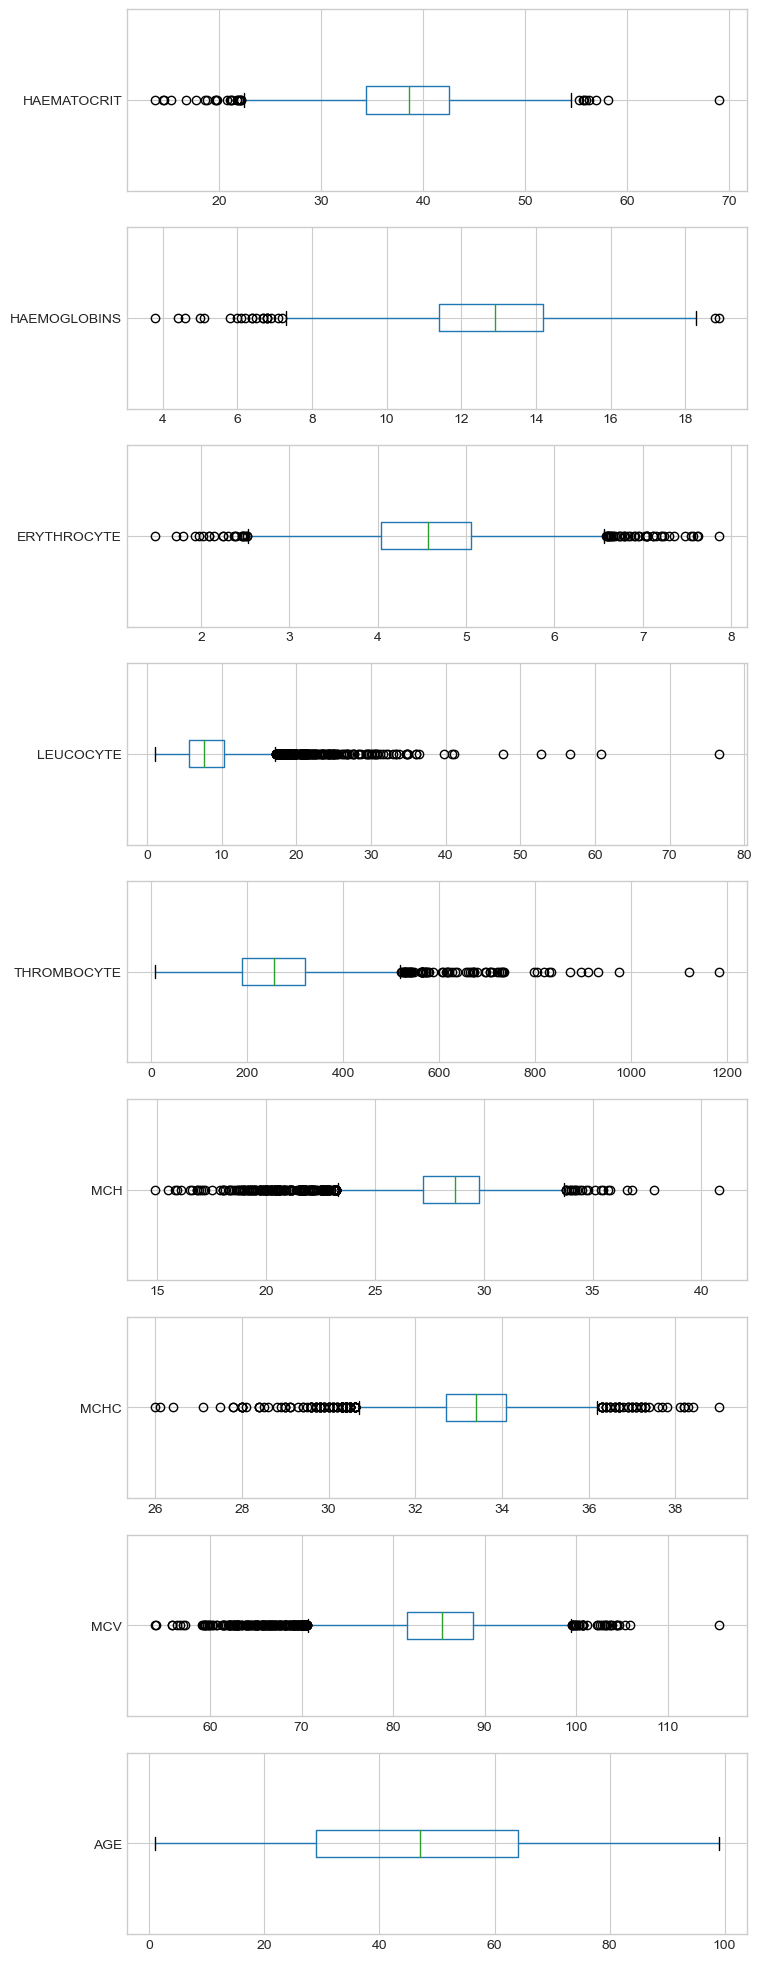

In [23]:
# Boxplot for each numerical feature

fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = data[[c]].boxplot(ax=axes[i], vert=False)

##### Density plot

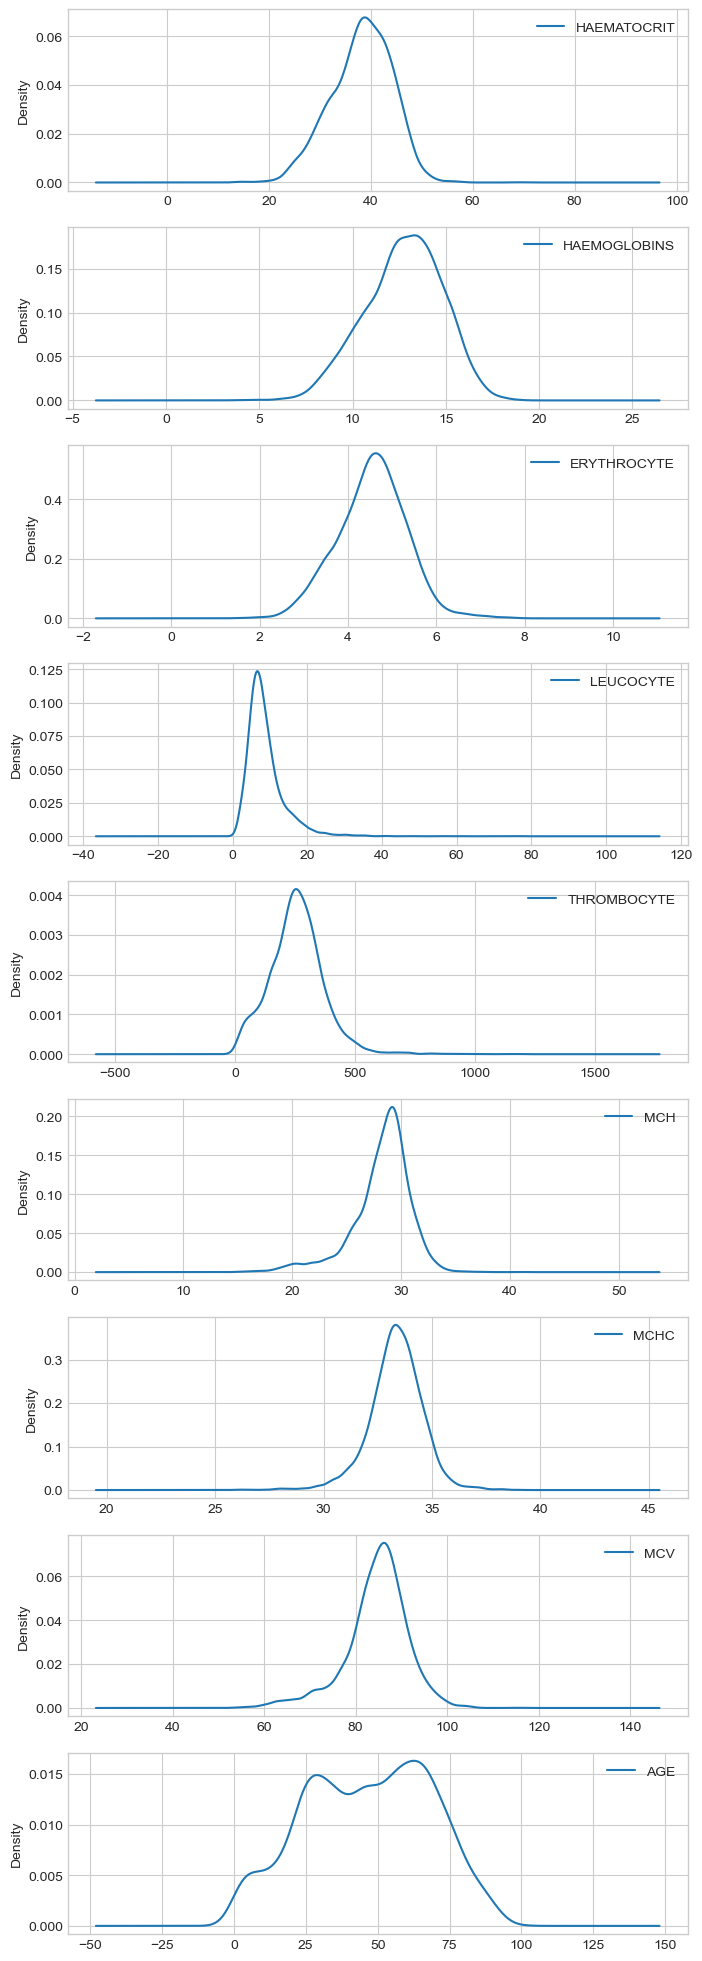

In [24]:
# Kernel Density Estimation plot for each numerical feature

fig, axes = plt.subplots(9, 1, figsize=(8, 25))
for i, c in enumerate(num_features):
    f = data[[c]].plot(kind='kde',ax=axes[i])

Observations:
- Few outliers are present in some numerical features
- Most of the features follows the Gaussian distribution (approx.)

### 6.1.3 Categorical feature(s)
name : SEX<br>
labels : F, M

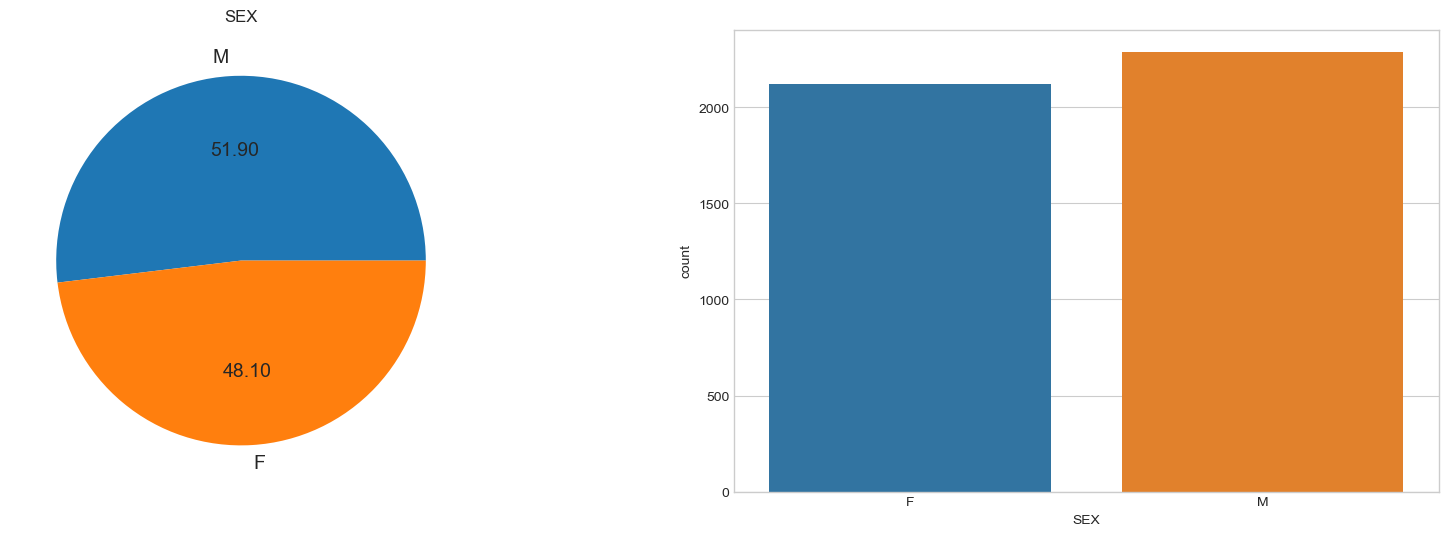

In [25]:
# Bar and count plot for Categorical feature
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
df = data['SEX'].value_counts()
barplot = df.plot(kind='pie', ax=axes[0], title='SEX', autopct="%.2f", fontsize=14, ylabel='')
countplot = sns.countplot(x='SEX', data=data, ax=axes[1])

## 6.2 Bivariate analysis

### 6.2.1 Numerical features

#### KDE plot

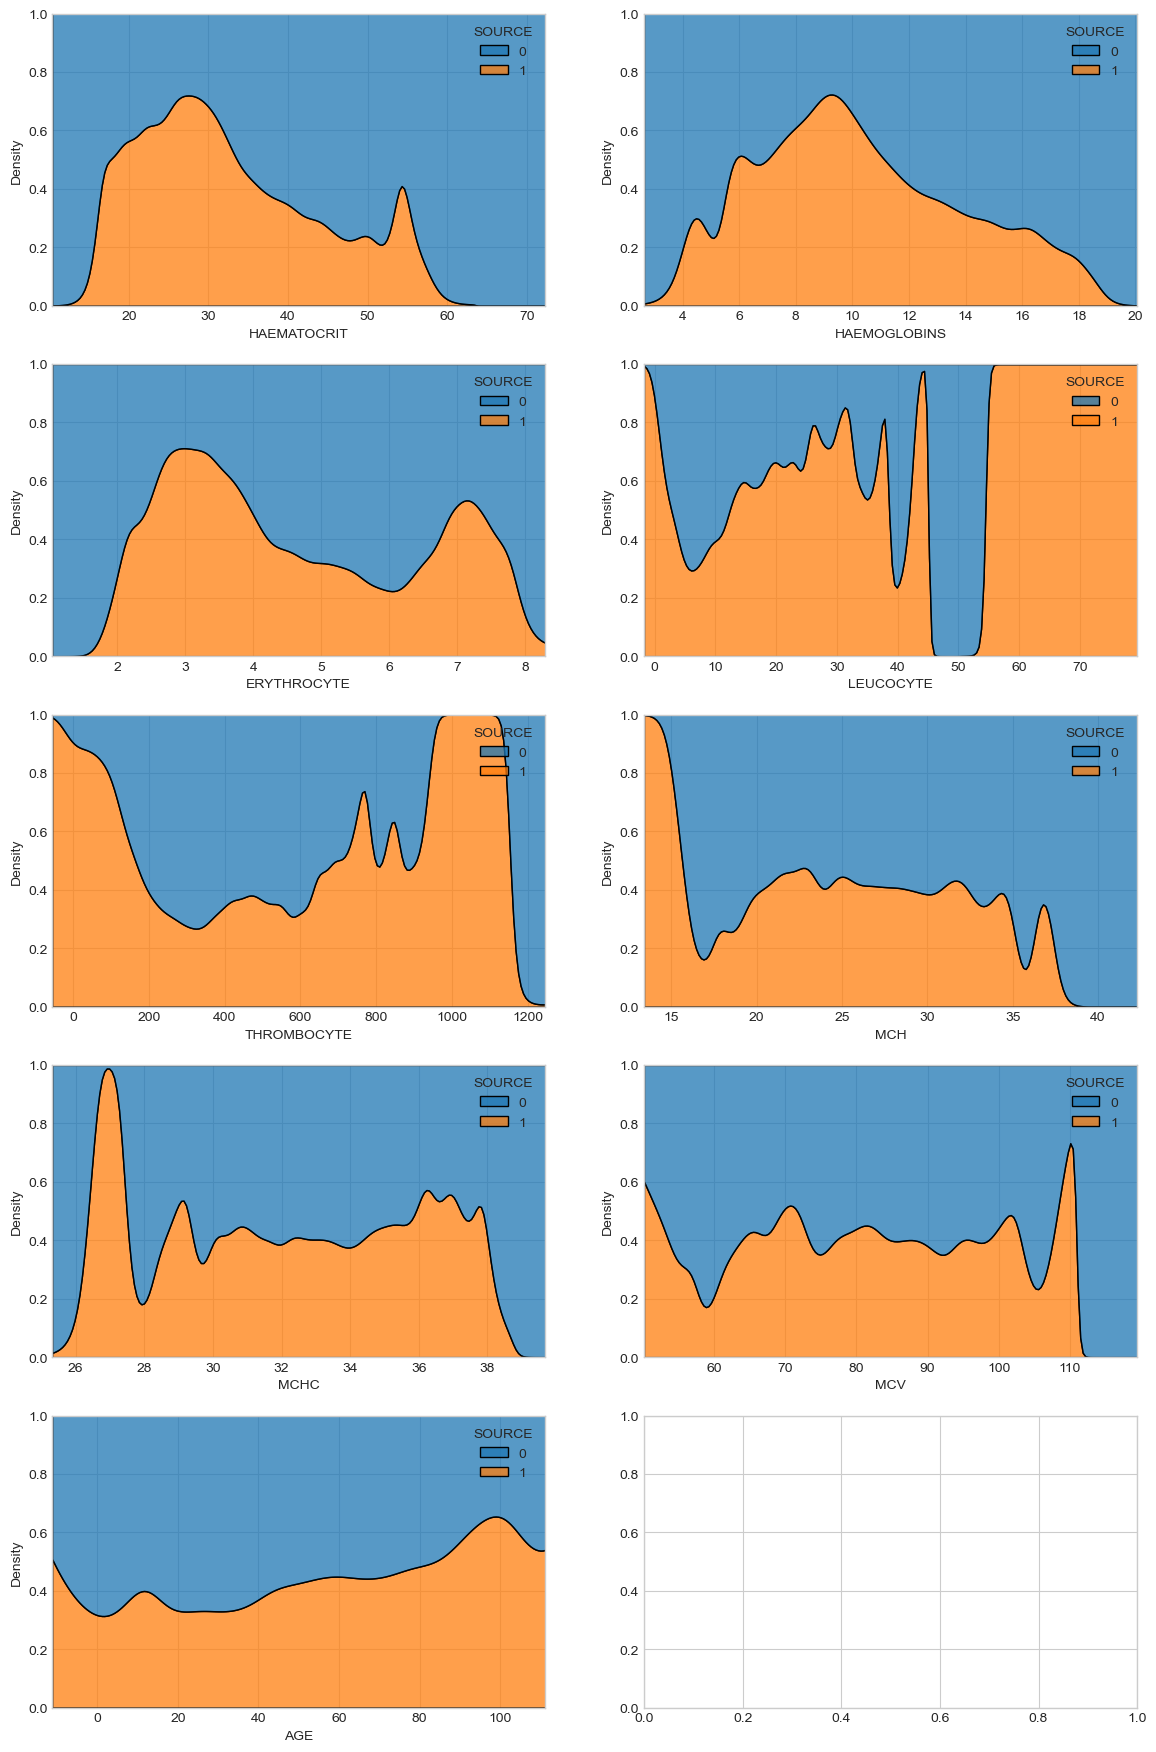

In [26]:
# KDEplot for each numerical feature w.r.t target

fig, axes = plt.subplots(5,2, figsize=(14,22))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[num_features]):
    plot = sns.kdeplot(data=data, x=c, hue='SOURCE', multiple='fill', ax=axes[i])

#### Bar plot

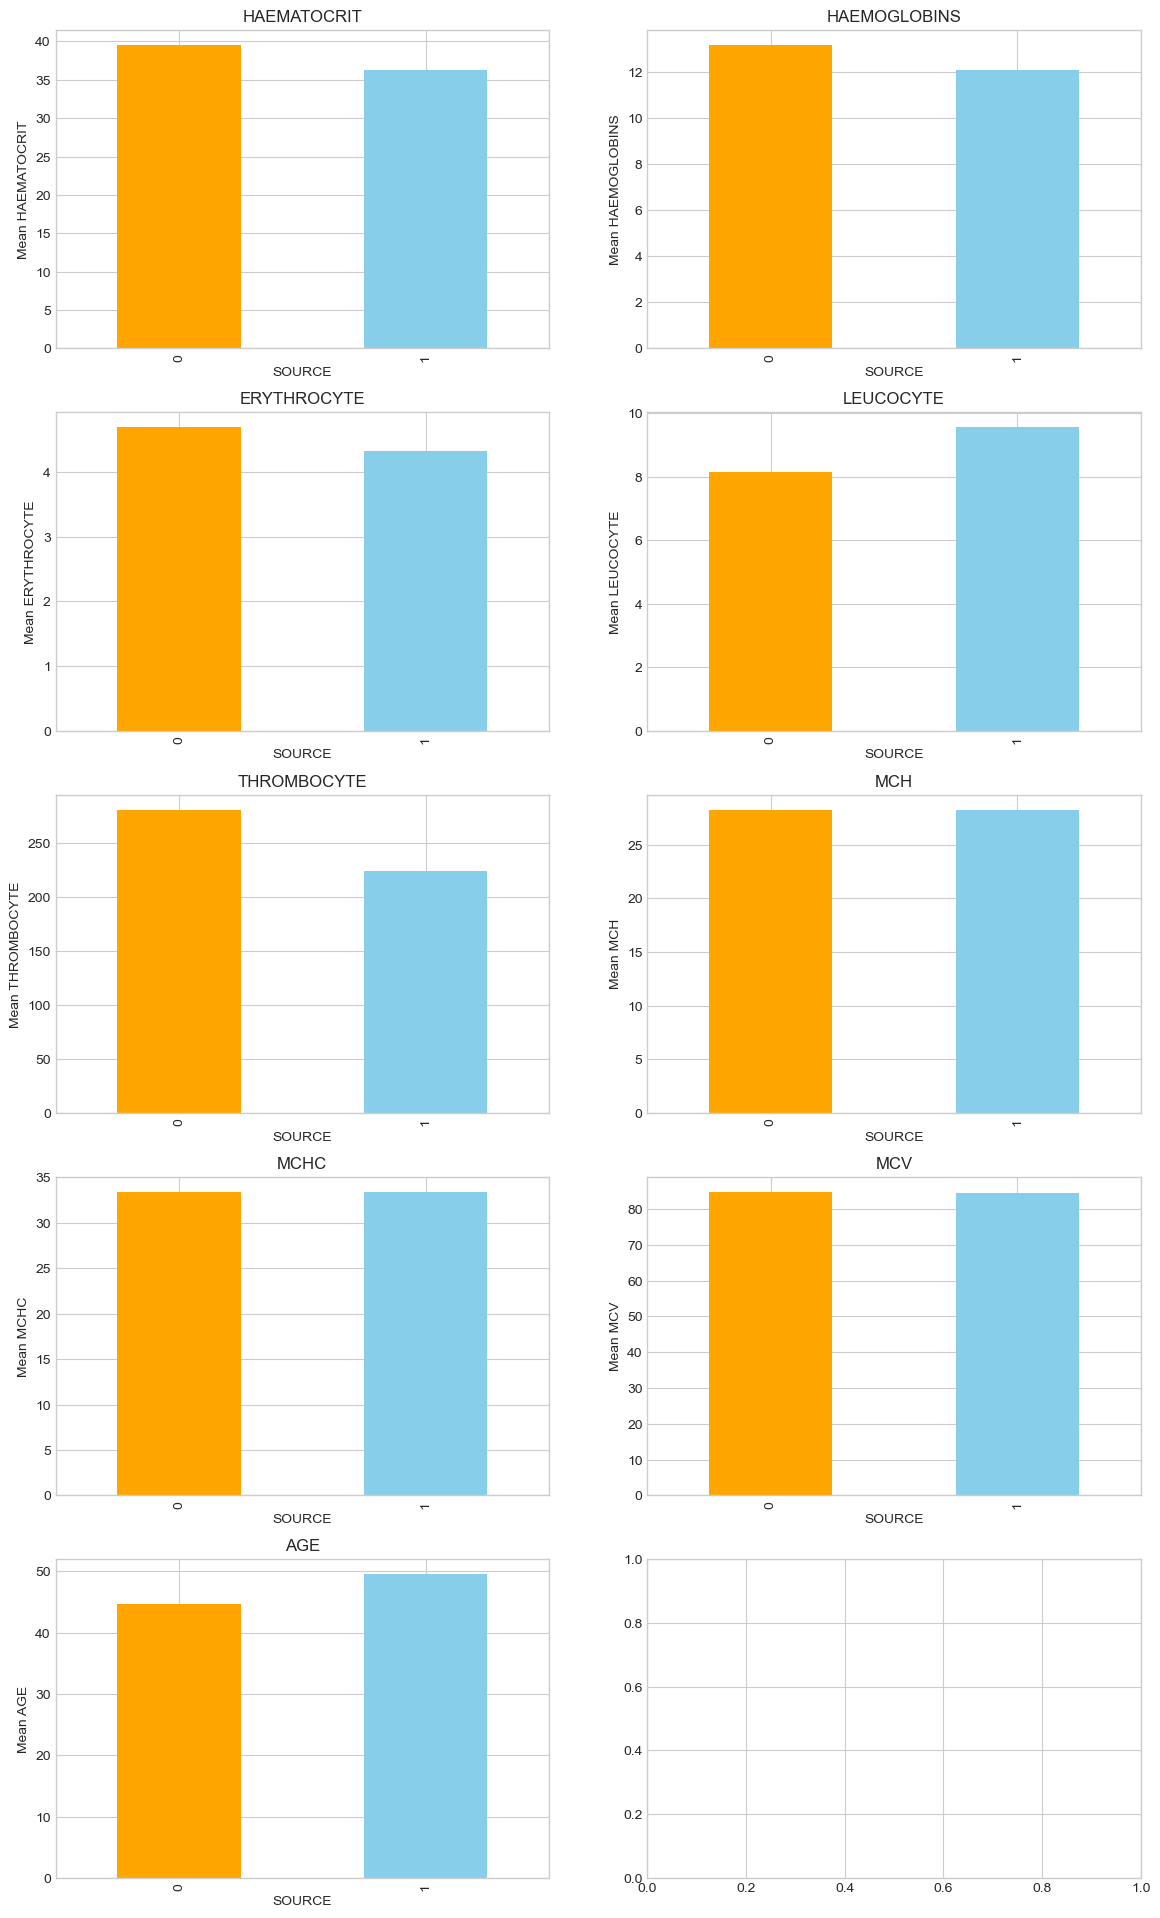

In [27]:
# Relationship between target and mean of each numerical features

fig, axes = plt.subplots(5,2, figsize=(14,24))
axes = [ax for axes_row in axes for ax in axes_row]
for i,c in enumerate(data[num_features]):
    df = data.groupby("SOURCE")[c].mean()
    plot = df.plot(kind='bar', title=c, ax=axes[i], ylabel=f'Mean {c}', color=('orange','skyblue'))

Observations:
- On average, The quantity of HAEMOTOCRIT, HAEMOGLOBINS, ERYTHROCYTE, and THROMBOCYTE features are lesser in In care patients.
- MCH, MCHV, MCV are less informative to differentiate classes
- The mean age of Incare patients is greater than the Outcare patients.

#### Correlation - matrix

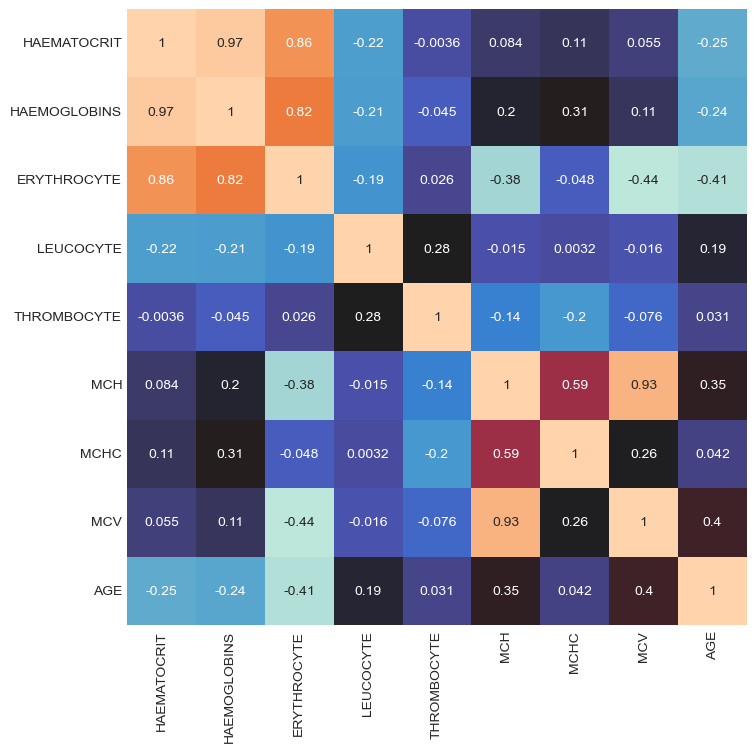

In [42]:
corr_matt = data[num_features].corr(method='pearson')
plt.figure(figsize=(8,8))
corr = sns.heatmap(corr_matt, annot=True, cmap='icefire', cbar=False)

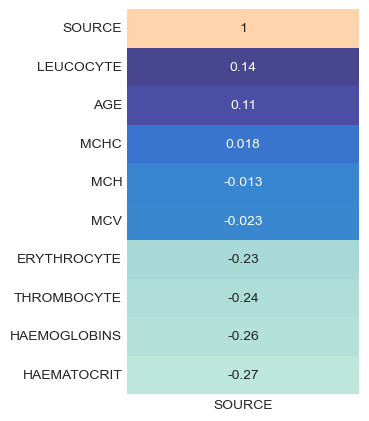

In [43]:
corr_matt = data.corr(method='pearson')[['SOURCE']].sort_values(by='SOURCE',ascending=False)
plt.figure(figsize=(3,5))
corr = sns.heatmap(corr_matt, annot=True, cmap='icefire', cbar=False)

Observations:
- LEUCOCYTE and AGE are postively correlated with target
- THROMBOCYTE, ERYTHROCYTE, HAEMOGLOBINS and HAEMATOCRIT are negatively correlated with target
- No notable correlation found between MCHC, MCH, MCV, and target

### 6.2.2 Categorical feature(s)

In [ ]:
# Mean of target==1 w.r.t SEX

df = data.groupby('SEX')['SOURCE'].mean().to_frame().reset_index()
plot = df.plot(kind='bar', x='SEX', y='SOURCE', color=('orange', 'skyblue'))

Observation:
- Male Incare patients are more in number than Female Incare patients

# 7. Feature Engineering

### Label encoding

In [ ]:
X_train.SEX.replace({'F':0, 'M':1}, inplace=True)
X_test.SEX.replace({'F':0, 'M':1}, inplace=True)

### Feature Scaling

Transform all the numerical features into a range [0, 1]

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))

X_train[num_features] = scaler.fit_transform(X_train[num_features]) #fit and transform the train set
X_test[num_features] = scaler.transform(X_test[num_features]) #transform the test test

In [ ]:
X_train.head(3)

# 8. Feature selection
In exploratory data analysis, we found out that the features MCH, MCHC and MCV are not very useful in predicting the target. Let's remove those features.

In [ ]:
X_train.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)
X_test.drop(['MCH', 'MCHC','MCV'], axis=1, inplace=True)

# final train set
X_train.head(3)

# 9. Machine Learning

### Decision Tree Classifier

In [ ]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, tree.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, tree.predict(X_test)))

#### Hyperparameter tuning of Decision tree classifier

In [ ]:
distribution = {'max_depth': [4, 6, 8, 10, 12, 14, 16],
                'criterion': ['gini', 'entropy'],
                'min_samples_split': [2, 10, 20, 30, 40],
                'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                'max_leaf_nodes': [8, 16, 32, 64, 128,256],
                'class_weight': [{0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 1, 1: 5}]
               }
search = RandomizedSearchCV(DecisionTreeClassifier(random_state=1),
                         distribution,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=30)
search.fit(X_train, y_train)
search.best_params_

In [ ]:
best_tree = search.best_estimator_
best_tree.fit(X_train, y_train)
print(" Best train accuracy : ", accuracy_score(y_train, best_tree.predict(X_train)))
print(" Best test accuracy : ", accuracy_score(y_test, best_tree.predict(X_test)))

In [ ]:
print(classification_report(y_test, best_tree.predict(X_test)))

### Logistic regression

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, logreg.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, logreg.predict(X_test)))

#### Hyperparameter tuning for Logistic regression

In [ ]:
# Hyperparameters
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
              'penalty':['l1', 'l2', 'elasticnet', 'none'],
              'fit_intercept':[True, False],
              'max_iter':[100, 200, 300],
              'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 4}, {0: 1, 1: 5}]
             }

# Random search for best hyperparameters
search = RandomizedSearchCV(LogisticRegression(random_state=1),
                         param_grid,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=30)

search.fit(X_train, y_train)

# Best parameters for Logistic regression classifier
search.best_params_

In [ ]:
# Retrain with best model

best_logreg = search.best_estimator_

best_logreg.fit(X_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_logreg.predict(X_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_logreg.predict(X_test)))

In [ ]:
print(classification_report(y_test, best_logreg.predict(X_test)))

### Support Vector Classifier (SVC)

In [ ]:
svc = SVC(random_state=1)

svc.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, svc.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, svc.predict(X_test)))

#### Hyperparameter tuning - Support vector classifier

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'rbf', 'poly'],
              'degree':[0, 1, 2, 3, 4, 5, 6]
             } 
search = RandomizedSearchCV(SVC(random_state=1),
                         param_grid,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=30)
search.fit(X_train, y_train)
search.best_params_

In [ ]:
# Retrain with best model

best_svc = search.best_estimator_

best_svc.fit(X_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_svc.predict(X_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_svc.predict(X_test)))

In [ ]:
print(classification_report(y_test, best_svc.predict(X_test)))

### Random forest classifer

In [ ]:
forest = RandomForestClassifier(random_state=1)
forest.fit(X_train, y_train)
print("Train accuracy : ", accuracy_score(y_train, forest.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, forest.predict(X_test)))

#### Hyperparameter tuning - Random forest classifier

In [ ]:
params_grid = {'bootstrap': [True, False],
             'max_depth': [2, 5, 10, 20, None],
             'max_features': ['auto', 'sqrt'],
             'min_samples_leaf': [1, 2, 4],
             'min_samples_split': [2, 5, 10],
             'n_estimators': [50, 100, 150, 200]}
search = RandomizedSearchCV(RandomForestClassifier(random_state=1),
                         params_grid,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=20)

search.fit(X_train, y_train)
search.best_params_

In [ ]:
best_forest = search.best_estimator_
best_forest.fit(X_train, y_train)
print("Best train accuracy : ", accuracy_score(y_train, best_forest.predict(X_train)))
print("Best test accuracy : ", accuracy_score(y_test, best_forest.predict(X_test)))

In [ ]:
print(classification_report(y_test, best_forest.predict(X_test)))

### Stacking classifier
Combine all the best models

In [ ]:
stack = StackingClassifier(estimators=[('best tree classifier', best_tree),
                                       ('best logreg', best_logreg),
                                       ('best svc', best_svc),
                                       ('best forest classifier', best_forest)],
                           
                           final_estimator=LogisticRegression(),
                           passthrough=True)

stack.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, stack.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, stack.predict(X_test)))

In [ ]:
print(classification_report(y_test, stack.predict(X_test)))

## Save the final pipeline

In [ ]:
# final features
features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE','THROMBOCYTE', 'AGE', 'SEX']
num_features = ['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE','THROMBOCYTE', 'AGE']

X = data[features] # feature set
y = data['SOURCE'] # target

# Splitting data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Label encoding
X_train.SEX.replace({'M':1, 'F':0}, inplace=True)
X_test.SEX.replace({'M':1, 'F':0}, inplace=True)

# Feature scaling
scaler = MinMaxScaler(feature_range=(0, 1))

X_train[num_features] = scaler.fit_transform(X_train[num_features])
X_test[num_features] = scaler.transform(X_test[num_features])

# Train the final model again!
model = StackingClassifier(estimators=[('best tree classifier', best_tree),
                                       ('best logreg', best_logreg),
                                       ('best svc', best_svc),
                                       ('best forest classifier', best_forest)],
                           
                           final_estimator=LogisticRegression(),
                           passthrough=True)

model.fit(X_train, y_train)
print("Final model trained Successfully!")

# Pickle scaler object
with open("scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)
    
# Pickle model object
with open("model.pkl", 'wb') as file:
    pickle.dump(model, file)

print("Pickled and Saved Successfully!")

### --------------------------- THE END ----------------------------

# Gaussian Navie Bayes Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

print("Train accuracy : ", accuracy_score(y_train, nb.predict(X_train)))
print("Test accuracy : ", accuracy_score(y_test, nb.predict(X_test)))

distribution = {'var_smoothing': [1e-1, 1e-3, 1e-5, 1e-7, 1e-9]}

search = RandomizedSearchCV(GaussianNB(),
                         distribution,
                         scoring='accuracy',
                         cv=3,
                         verbose=1,
                         random_state=1,
                         n_iter=5)

search.fit(X_train, y_train)
search.best_params_

best_nb = search.best_estimator_
best_nb.fit(X_train, y_train)
print(" Best train accuracy : ", accuracy_score(y_train, best_nb.predict(X_train)))
print(" Best test accuracy : ", accuracy_score(y_test, best_nb.predict(X_test)))
print(classification_report(y_test, best_nb.predict(X_test)))

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy scores for the different models
train_accuracy = [accuracy_score(y_train, nb.predict(X_train)),
                  accuracy_score(y_train, search.predict(X_train)),
                  accuracy_score(y_train, best_nb.predict(X_train))]
test_accuracy = [accuracy_score(y_test, nb.predict(X_test)),
                accuracy_score(y_test, search.predict(X_test)),
                accuracy_score(y_test, best_nb.predict(X_test))]

# Create the bar plot
plt.bar(range(len(train_accuracy)), train_accuracy, label='Train accuracy')
plt.bar(range(len(train_accuracy)), test_accuracy, bottom=train_accuracy, label='Test accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy for different models')
plt.legend()
plt.show()

## KNN CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameter distribution
param_dist = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Initialize RandomizedSearchCV
search = RandomizedSearchCV(knn, param_dist, cv=3, scoring='accuracy', verbose=1, n_iter=5, random_state=1)

# Fit the model to the training data
search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", search.best_params_)

# Fit the best model to the training data
best_knn = search.best_estimator_

# Print the accuracy of the best model
print(" Best train accuracy : ", accuracy_score(y_train, best_knn.predict(X_train)))
print(" Best test accuracy : ", accuracy_score(y_test, best_knn.predict(X_test)))
print(classification_report(y_test, best_knn.predict(X_test)))

## Gradient Boost classifer

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize Gradient Boosting Classifier
gbc = GradientBoostingClassifier()

# Define hyperparameter distribution
param_dist = {'learning_rate': [0.01, 0.1, 0.5, 1],
              'n_estimators': [50, 100, 200, 500],
              'max_depth': [1, 3, 5, 7],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4]}

# Initialize RandomizedSearchCV
search = RandomizedSearchCV(gbc, param_dist, cv=3, scoring='accuracy', verbose=1, random_state=1, n_iter=5)

# Fit the model to the training data
search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", search.best_params_)

# Fit the best model to the training data
best_gbc = search.best_estimator_

# Print the accuracy of the best model
print(" Best train accuracy : ", accuracy_score(y_train, best_gbc.predict(X_train)))
print(" Best test accuracy : ", accuracy_score(y_test, best_gbc.predict(X_test)))
print(classification_report(y_test, best_gbc.predict(X_test)))

## MLP classifer

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Initialize MLP Classifier
mlp = MLPClassifier()

# Define hyperparameter distribution
param_dist = {'hidden_layer_sizes': [(50,), (100,), (150,)],
              'activation': ['tanh', 'relu'],
              'solver': ['lbfgs', 'sgd', 'adam'],
              'alpha': [0.0001, 0.001, 0.01],
              'learning_rate': ['constant', 'invscaling', 'adaptive']}

# Initialize RandomizedSearchCV
search = RandomizedSearchCV(mlp, param_dist, cv=3, scoring='accuracy', verbose=1, random_state=1, n_iter=5)

# Fit the model to the training data
search.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", search.best_params_)

# Fit the best model to the training data
best_mlp = search.best_estimator_

# Print the accuracy of the best model
print(" Best train accuracy : ", accuracy_score(y_train, best_mlp.predict(X_train)))
print(" Best test accuracy : ", accuracy_score(y_test, best_mlp.predict(X_test)))
print(classification_report(y_test, best_mlp.predict(X_test)))